In [1]:
import tensorflow as tf

import numpy as np
import warnings
# suppress warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

2025-07-03 12:28:53.435066: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-03 12:28:53.464952: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-03 12:28:53.886395: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
""" creaza reteaua ANN pe 4 layer-ruri """
class NeuralNetwork:

    def __init__(self, nr_input, nr_L1, nr_L2, nr_L3, nr_L4):
        
        self.nr_input = nr_input
        self.nr_L1 = nr_L1
        self.nr_L2 = nr_L2
        self.nr_L3 = nr_L3
        self.nr_L4 = nr_L4

		# Initialize the weights
        self.w_L1 = np.random.randn(self.nr_input, self.nr_L1)
        self.w_L2 = np.random.randn(self.nr_L1, self.nr_L2)
        self.w_L3 = np.random.randn(self.nr_L2, self.nr_L3)
        self.w_L4 = np.random.randn(self.nr_L3, self.nr_L4)

		# Initialize the biases
        self.bias_L1 = np.zeros((1, self.nr_L1), dtype=np.float32)
        self.bias_L2 = np.zeros((1, self.nr_L2), dtype=np.float32)
        self.bias_L3 = np.zeros((1, self.nr_L3), dtype=np.float32)
        self.bias_L4 = np.zeros((1, self.nr_L4), dtype=np.float32)

        self.n = 1

		# Mean Squared Error
        self.loss_train = list()
        self.loss_val = list()
        self.acc = list()


    # Sigmoid Function
    def sigmoid(self, x):
        x = 1/(1 + np.exp(-x))
        return x

    # Derivative of Sigmoid Function
    def derivative_sigmoid(self, x):
        dx = self.sigmoid(x)*(1-self.sigmoid(x))
        return dx


    def feedforward(self, X):
        
        self.SL1 = np.dot(X, self.w_L1) + self.bias_L1
        self.AL1 = self.sigmoid(self.SL1)
        self.SL2 = np.dot(self.AL1, self.w_L2) + self.bias_L2
        self.AL2 = self.sigmoid(self.SL2)
        self.SL3 = np.dot(self.AL2, self.w_L3) + self.bias_L3
        self.AL3 = self.sigmoid(self.SL3)
        self.SL4 = np.dot(self.AL3, self.w_L4) + self.bias_L4
        self.AL4 = self.sigmoid(self.SL4)
        return self.AL4


    def backward(self, X, Y, learning_rate):
        
        # define loss
        err_out = -(Y - self.AL4)

        # define
        d_L4 = err_out * self.derivative_sigmoid(self.SL4)
        d_L3 = (np.dot(d_L4, self.w_L4.T)) * self.derivative_sigmoid(self.SL3)
        d_L2 = (np.dot(d_L3, self.w_L3.T)) * self.derivative_sigmoid(self.SL2)
        d_L1 = (np.dot(d_L2, self.w_L2.T)) * self.derivative_sigmoid(self.SL1)

        # define gradients 
        grad_L4 = np.dot(self.AL3.T, d_L4)
        grad_L3 = np.dot(self.AL2.T, d_L3)
        grad_L2 = np.dot(self.AL1.T, d_L2)
        grad_L1 = np.dot(X.T, d_L1)

		# Update weights
        self.w_L4 -= grad_L4 * learning_rate
        self.w_L3 -= grad_L3 * learning_rate
        self.w_L2 -= grad_L2 * learning_rate
        self.w_L1 -= grad_L1 * learning_rate

        m = Y.shape[0]# identifica numarul de pachete
        # Update biases
        self.bias_L4 -= np.sum(d_L4, axis=0, keepdims=True) * learning_rate 
        self.bias_L3 -= np.sum(d_L3, axis=0, keepdims=True) * learning_rate 
        self.bias_L2 -= np.sum(d_L2, axis=0, keepdims=True) * learning_rate
        self.bias_L1 -= np.sum(d_L1, axis=0, keepdims=True) * learning_rate
            # axis=0 -insumeaza pe verticala
            # keepdims=True -pastrand matricea originala
        
        
        if self.n < 2:

            print('---initialize w end bias---')
            print('w - matrix dimension')
            print('self.w_L4',self.w_L4.shape)
            print('self.w_L3',self.w_L3.shape)
            print('self.w_L2',self.w_L2.shape)
            print('self.w_L1',self.w_L1.shape)
            print()
            print('bias - matrix dimension')
            print('self.bias_L4',self.bias_L4.shape)
            print('self.bias_L3',self.bias_L3.shape)
            print('self.bias_L2',self.bias_L2.shape)
            print('self.bias_L1',self.bias_L1.shape)
            print('---')
            print()

            print('---feedforward---')
            print('matrix dimension')
            print('self.SL1',self.SL1.shape)
            print('self.AL1',self.AL1.shape)
            print('self.SL2',self.SL2.shape)
            print('self.AL2',self.AL2.shape)
            print('self.SL3',self.SL3.shape)
            print('self.AL3',self.AL3.shape)
            print('self.SL4',self.SL4.shape)
            print('self.AL4',self.AL4.shape)
            print()
            print('self.SL4 = np.dot(self.AL3, self.w_L4) + self.bias_L4')
            print(self.SL4.shape, '=', self.AL3.shape, 'X', self.w_L4.shape, '+', self.bias_L4.shape)
            print('---')
            print()

            print('---backward---')
            print('matrix dimension delta')
            print('err_out',err_out.shape)
            print('d_L4',d_L4.shape)
            print('d_L3',d_L3.shape)
            print('d_L2',d_L2.shape)
            print('d_L1',d_L1.shape)
            print()
            print('exemple ','d_L3 = (np.dot(d_L4, self.w_L4.T)) * self.derivative_sigmoid(self.SL3)')
            print('exemple ', d_L3.shape, '=',d_L4.shape,' X ', self.w_L4.T.shape, ' X ', self.derivative_sigmoid(self.SL3).shape)
            print()
            print('size of gradient matrices')
            print('grad_L4',grad_L4.shape)
            print('grad_L3',grad_L3.shape)
            print('grad_L2',grad_L2.shape)
            print('grad_L1',grad_L1.shape)
            print()
            print('exemple ','self.AL3.T X d_L4 = grad_L4')
            print('exemple ', grad_L4.shape, '=',self.AL3.T.shape,' X ', d_L4.shape)
            print('---')
            print()
            self.n += 1

    def train(self, X, Y, X_val, Y_val, epochs, learning_rate):
        for epoch in range(1,epochs+1):

            loss_train = []
            loss_batch = []
            for X_batch, Y_batch in zip(X,Y):
            
                output = self.feedforward(X_batch)
                self.backward(X_batch, Y_batch, learning_rate)

                # Mean Squared Error for loss_batch
                loss = np.mean(np.square(Y_batch - output))
                loss_batch.append(loss)

            # Mean Squared Error for loss_train
            loss_train.append(np.mean(loss_batch))
            self.loss_train.append(loss_train)

            # Mean Squared Error for loss_val
            loss_val = np.mean(np.square(Y_val - self.feedforward(X_val)))
            self.loss_val.append(loss_val)

            # accuracy metric validation data
            acc = np.sum(np.equal(np.argmax(Y_val, axis=1), np.argmax(self.feedforward(X_val), axis=1)))/X_val.shape[0]
            self.acc.append(acc)
            
            print(f"Epoch {epoch}, Loss_train:{loss_train}, Loss_val:{loss_val}, accuracy_val:{acc}")

    def error(self):
        return self.loss_train, self.loss_val, self.acc

#


In [3]:
# load the database
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

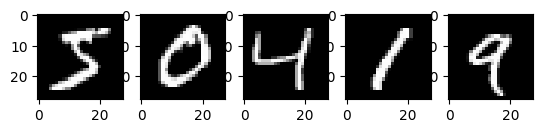

In [4]:
plt.figure(1)
plt.gray()
n=5
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(x_train[i])
plt.savefig("numere.jpg")
plt.show()

In [5]:
# normalize database images
x_train = x_train / 255
x_val = x_val / 255
print(x_train.shape)
print(x_val.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
# convert database labels from decimal to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
print(y_train.shape)
print(y_val.shape)

(60000, 10)
(10000, 10)


In [7]:
# convert images to flat
x_train = x_train.reshape(-1,784) # 28 x 28 = 784
x_val = x_val.reshape(-1,784)
print(x_train.shape)
print(x_val.shape)

(60000, 784)
(10000, 784)


In [8]:
# create batches
def batch_generator(x, y, batch_size):
    xx = []
    yy = []
    for i in range(0, x.shape[0], batch_size):
        xx.append(x[i:i + batch_size,:])
        yy.append(y[i:i + batch_size,:])
    xx = np.array(xx)
    yy = np.array(yy)
    return xx,yy

batch_size = 100 # in this case the batch size must be divided by 60000 to achieve the 3D array matrix
train_x, train_y = batch_generator(x_train,y_train,batch_size) 

print(train_x.shape)
print(train_y.shape)



(600, 100, 784)
(600, 100, 10)


In [9]:
#  define the input size (flat)
nr_input = train_x.shape[2]

# define the number of perceptons per layer
nr_L1 = 64
nr_L2 = 32
nr_L3 = 16
nr_L4 = train_y.shape[2]

#  create the object, of the NeuralNetwork class
mlp = NeuralNetwork(nr_input, nr_L1, nr_L2, nr_L3, nr_L4)

In [10]:
# start training
mlp.train(train_x, train_y, x_val, y_val, 30, learning_rate=0.01)

---initialize w end bias---
w - matrix dimension
self.w_L4 (16, 10)
self.w_L3 (32, 16)
self.w_L2 (64, 32)
self.w_L1 (784, 64)

bias - matrix dimension
self.bias_L4 (1, 10)
self.bias_L3 (1, 16)
self.bias_L2 (1, 32)
self.bias_L1 (1, 64)
---

---feedforward---
matrix dimension
self.SL1 (100, 64)
self.AL1 (100, 64)
self.SL2 (100, 32)
self.AL2 (100, 32)
self.SL3 (100, 16)
self.AL3 (100, 16)
self.SL4 (100, 10)
self.AL4 (100, 10)

self.SL4 = np.dot(self.AL3, self.w_L4) + self.bias_L4
(100, 10) = (100, 16) X (16, 10) + (1, 10)
---

---backward---
matrix dimension delta
err_out (100, 10)
d_L4 (100, 10)
d_L3 (100, 16)
d_L2 (100, 32)
d_L1 (100, 64)

exemple  d_L3 = (np.dot(d_L4, self.w_L4.T)) * self.derivative_sigmoid(self.SL3)
exemple  (100, 16) = (100, 10)  X  (10, 16)  X  (100, 16)

size of gradient matrices
grad_L4 (16, 10)
grad_L3 (32, 16)
grad_L2 (64, 32)
grad_L1 (784, 64)

exemple  self.AL3.T X d_L4 = grad_L4
exemple  (16, 10) = (16, 100)  X  (100, 10)
---

Epoch 1, Loss_train:[0.075508988

In [11]:
loss_train, loss_val, acc = mlp.error()

<Figure size 640x480 with 0 Axes>

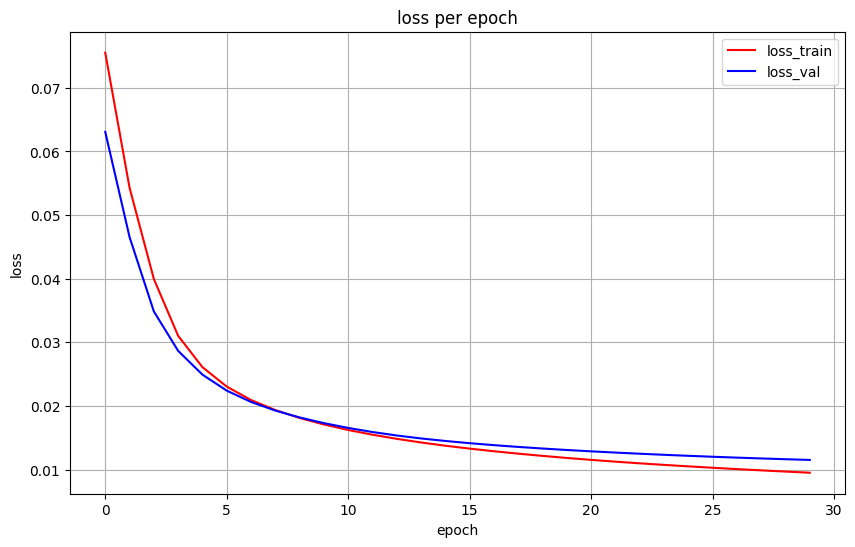

In [12]:
plt.figure(2)
plt.figure(figsize=(10,6))
plt.plot(loss_train, color = 'red', label = 'loss_train')
plt.plot(loss_val, color = 'blue', label = 'loss_val')
plt.title('loss per epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

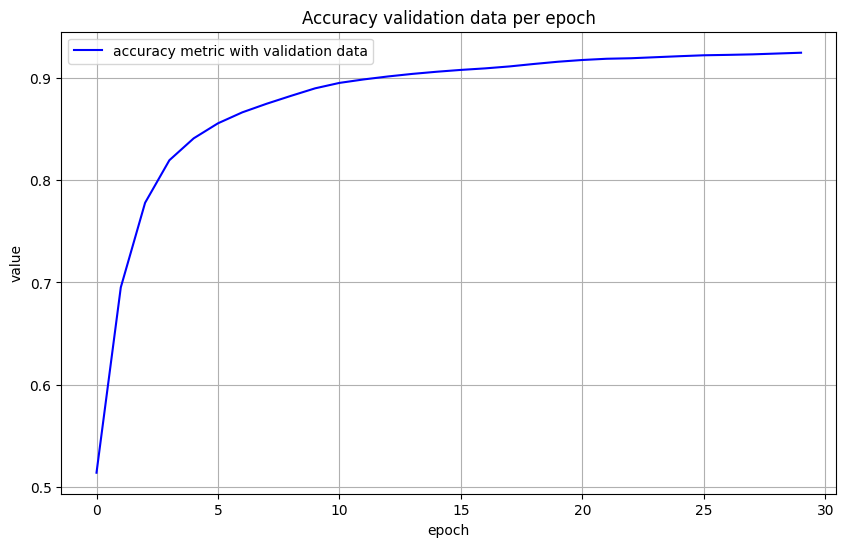

In [13]:
plt.figure(3)
plt.figure(figsize=(10,6)) 
plt.plot(acc, color = 'blue', label = 'accuracy metric with validation data') 
plt.title('Accuracy validation data per epoch')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend() 
plt.grid()
plt.show()

In [14]:
# test with validation data
prediction = mlp.feedforward(x_val)

# flat to matrix image
image_number = x_val.reshape(-1,28,28)


data validation label -->  7

prediction -->  7

image input


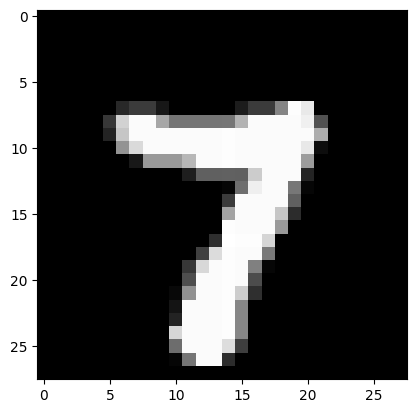

In [15]:
n = 1100  # n 0 - 10000

print()
print('data validation label --> ', np.argmax(y_val[n]))
print()
print('prediction --> ', np.argmax(prediction[n]))
print()
print('image input')
plt.imshow(image_number[n])
plt.show()